In [1]:
%run common-imports.ipynb

#   Univariate 2


## Prerequisites

Before studying this notebook, go through prior notebooks:

* Notebook 1: `univariate-1.ipynb`
* Notebook 2: `dataset-2.ipynb`
* Notebook 3: `runge-phenomenon-dataset-3.ipynb`
the main topic on this notebook.

## Lab Goals

* will explore this data, observe its statistical characteristics, visualize it.
* Next, will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

This lab should have given you some fluency in dealing with polynomial regression.

In [2]:
#source = 'https://raw.githubusercontent.com/'
data = pd.read_csv("../datasets/univariate-2.csv")

In [3]:
data.head()

,x,y
0,0.00000,-5.920077
1,0.01001,0.685358
2,0.02002,-0.681487
3,0.03003,-1.834558
4,0.04004,2.239257


#### Descriptive statistics


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,1000.0,5.00000,2.891085,0.000000,2.500000,5.000000,7.500000,10.000000
y,1000.0,1.84601,7.440305,-17.343996,-4.075161,3.037892,7.935082,17.459383


#### Missing Values Analysis


In [5]:
data.isnull().sum()

x    0
y    0
dtype: int64

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling



In [6]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

### Plotting using matplotlib

Observe the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **what is the correlation  between the variables?** What does it say about the relationship between $x$ and $y$?


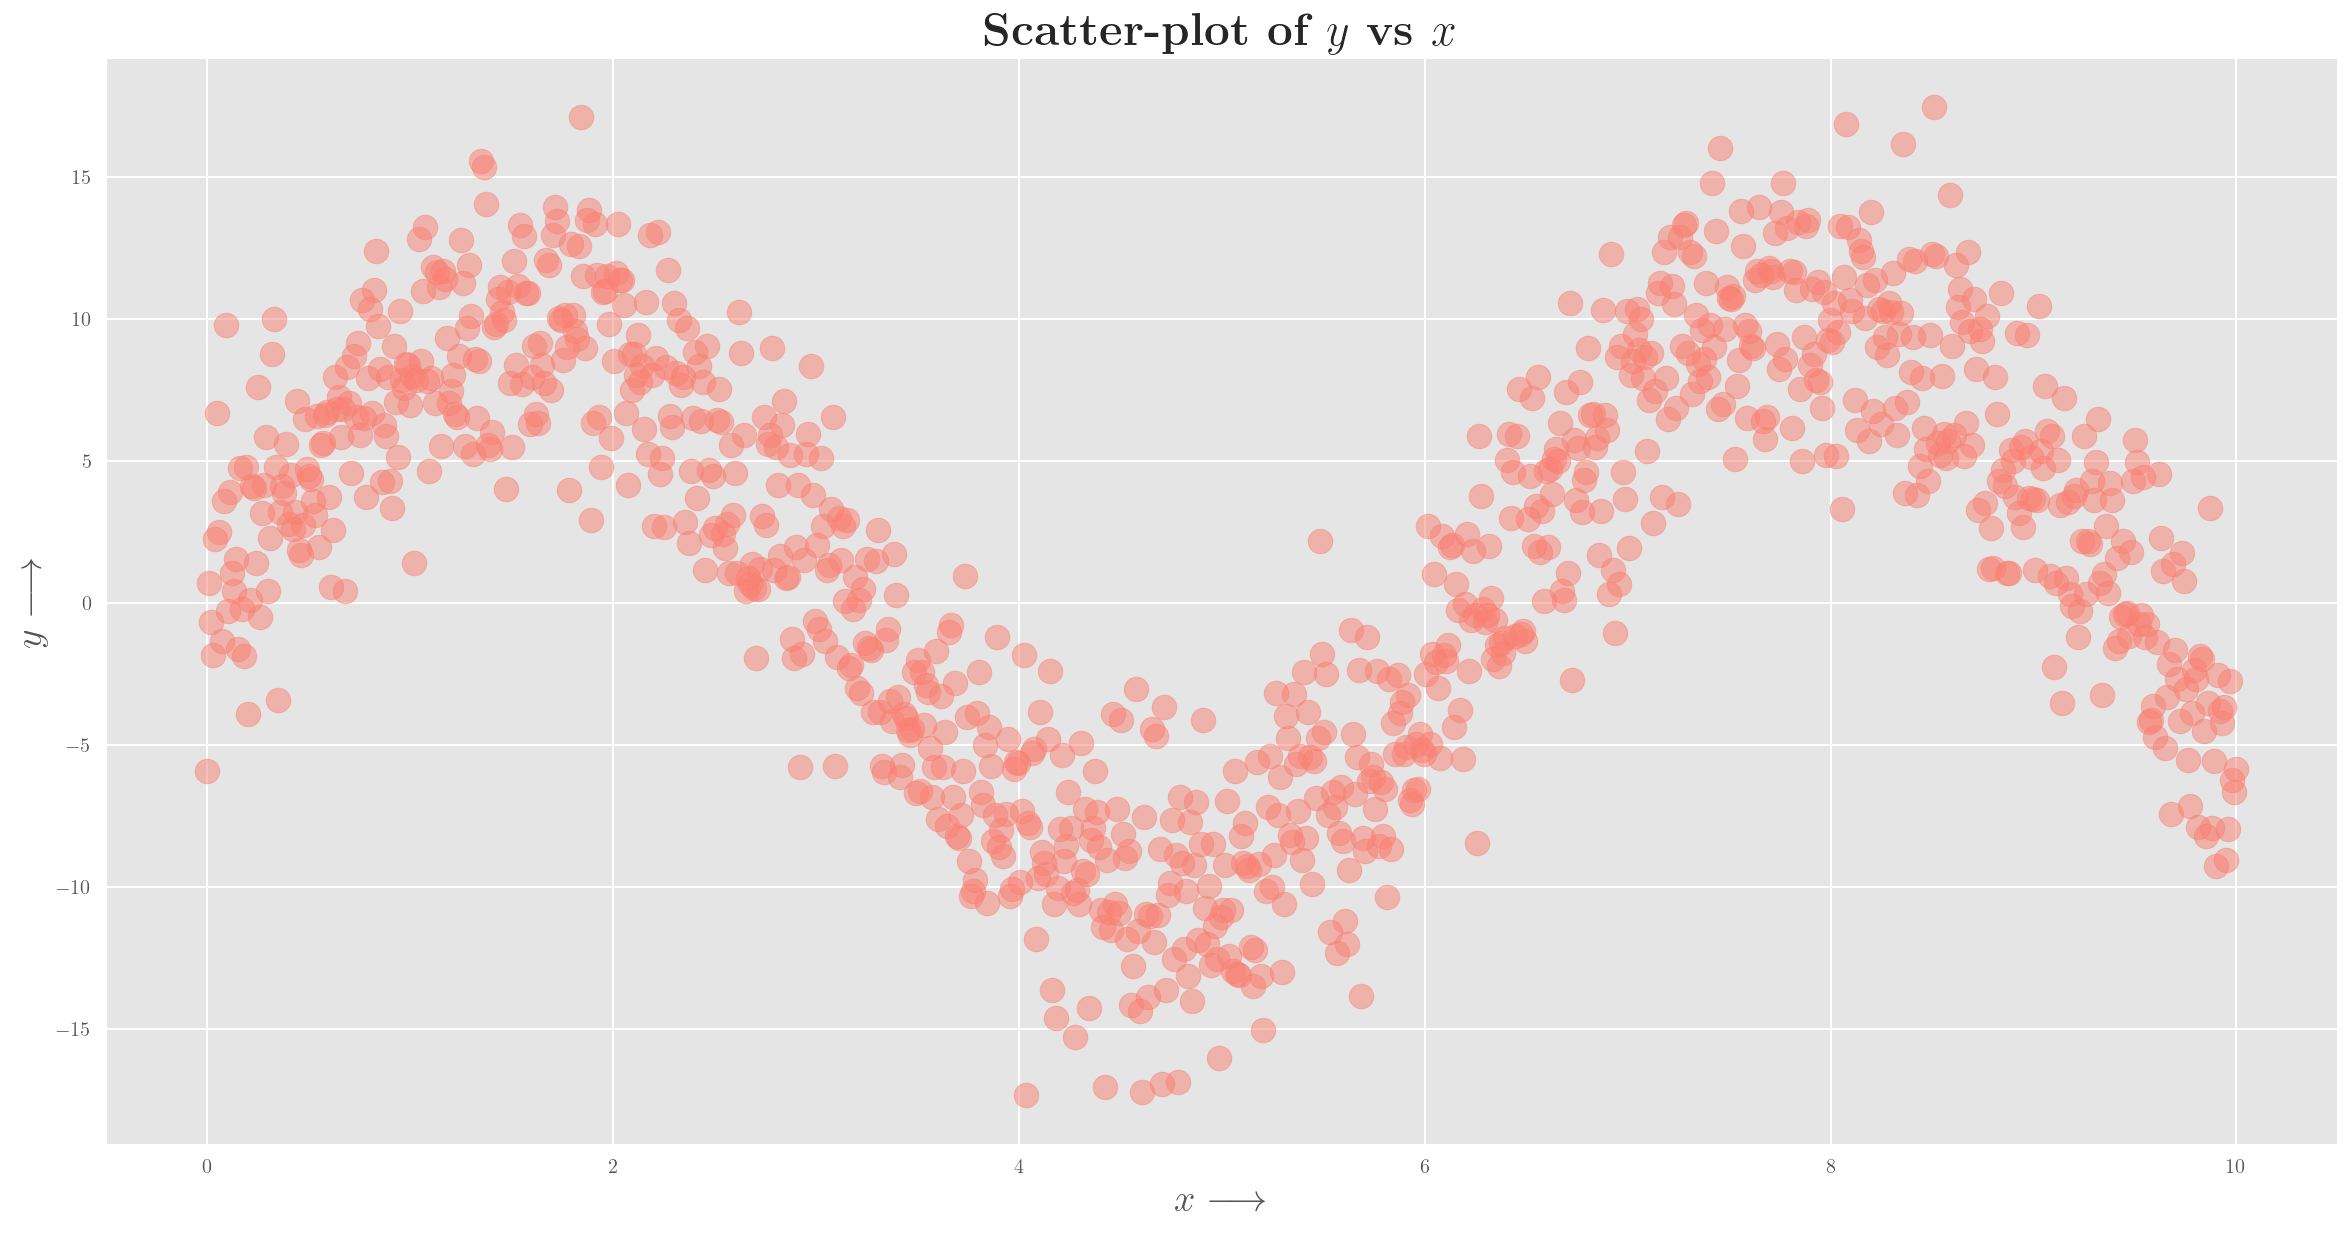

In [7]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

From the figure above, it should be apparent that a simple linear regression model is unlikely to work. However, let us first build a simple linear regression model for this dataset, in order to get a baseline performance.

As usual, we will first separate out the predictor from the target, and then split the data into a training and test set.

In [8]:
X, y = data[['x']], data['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

Observe that the predictor dataframe as `X` (note the capitalization), and the target as simply the array of values: `y`. While we could have named the variables anything, it is a well established practice in python based data science notebooks to follow this particular naming convention. It makes is much easier for other data scientists to read a notebook if it follows the well established naming conventions.

## Build a linear regression model

Let's build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [10]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [11]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: 2.27123414573338, Slope: [0.00775769]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let's use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [12]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 54.20
Coefficient of Determination (R^2):-0.016648143660481285


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis

start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

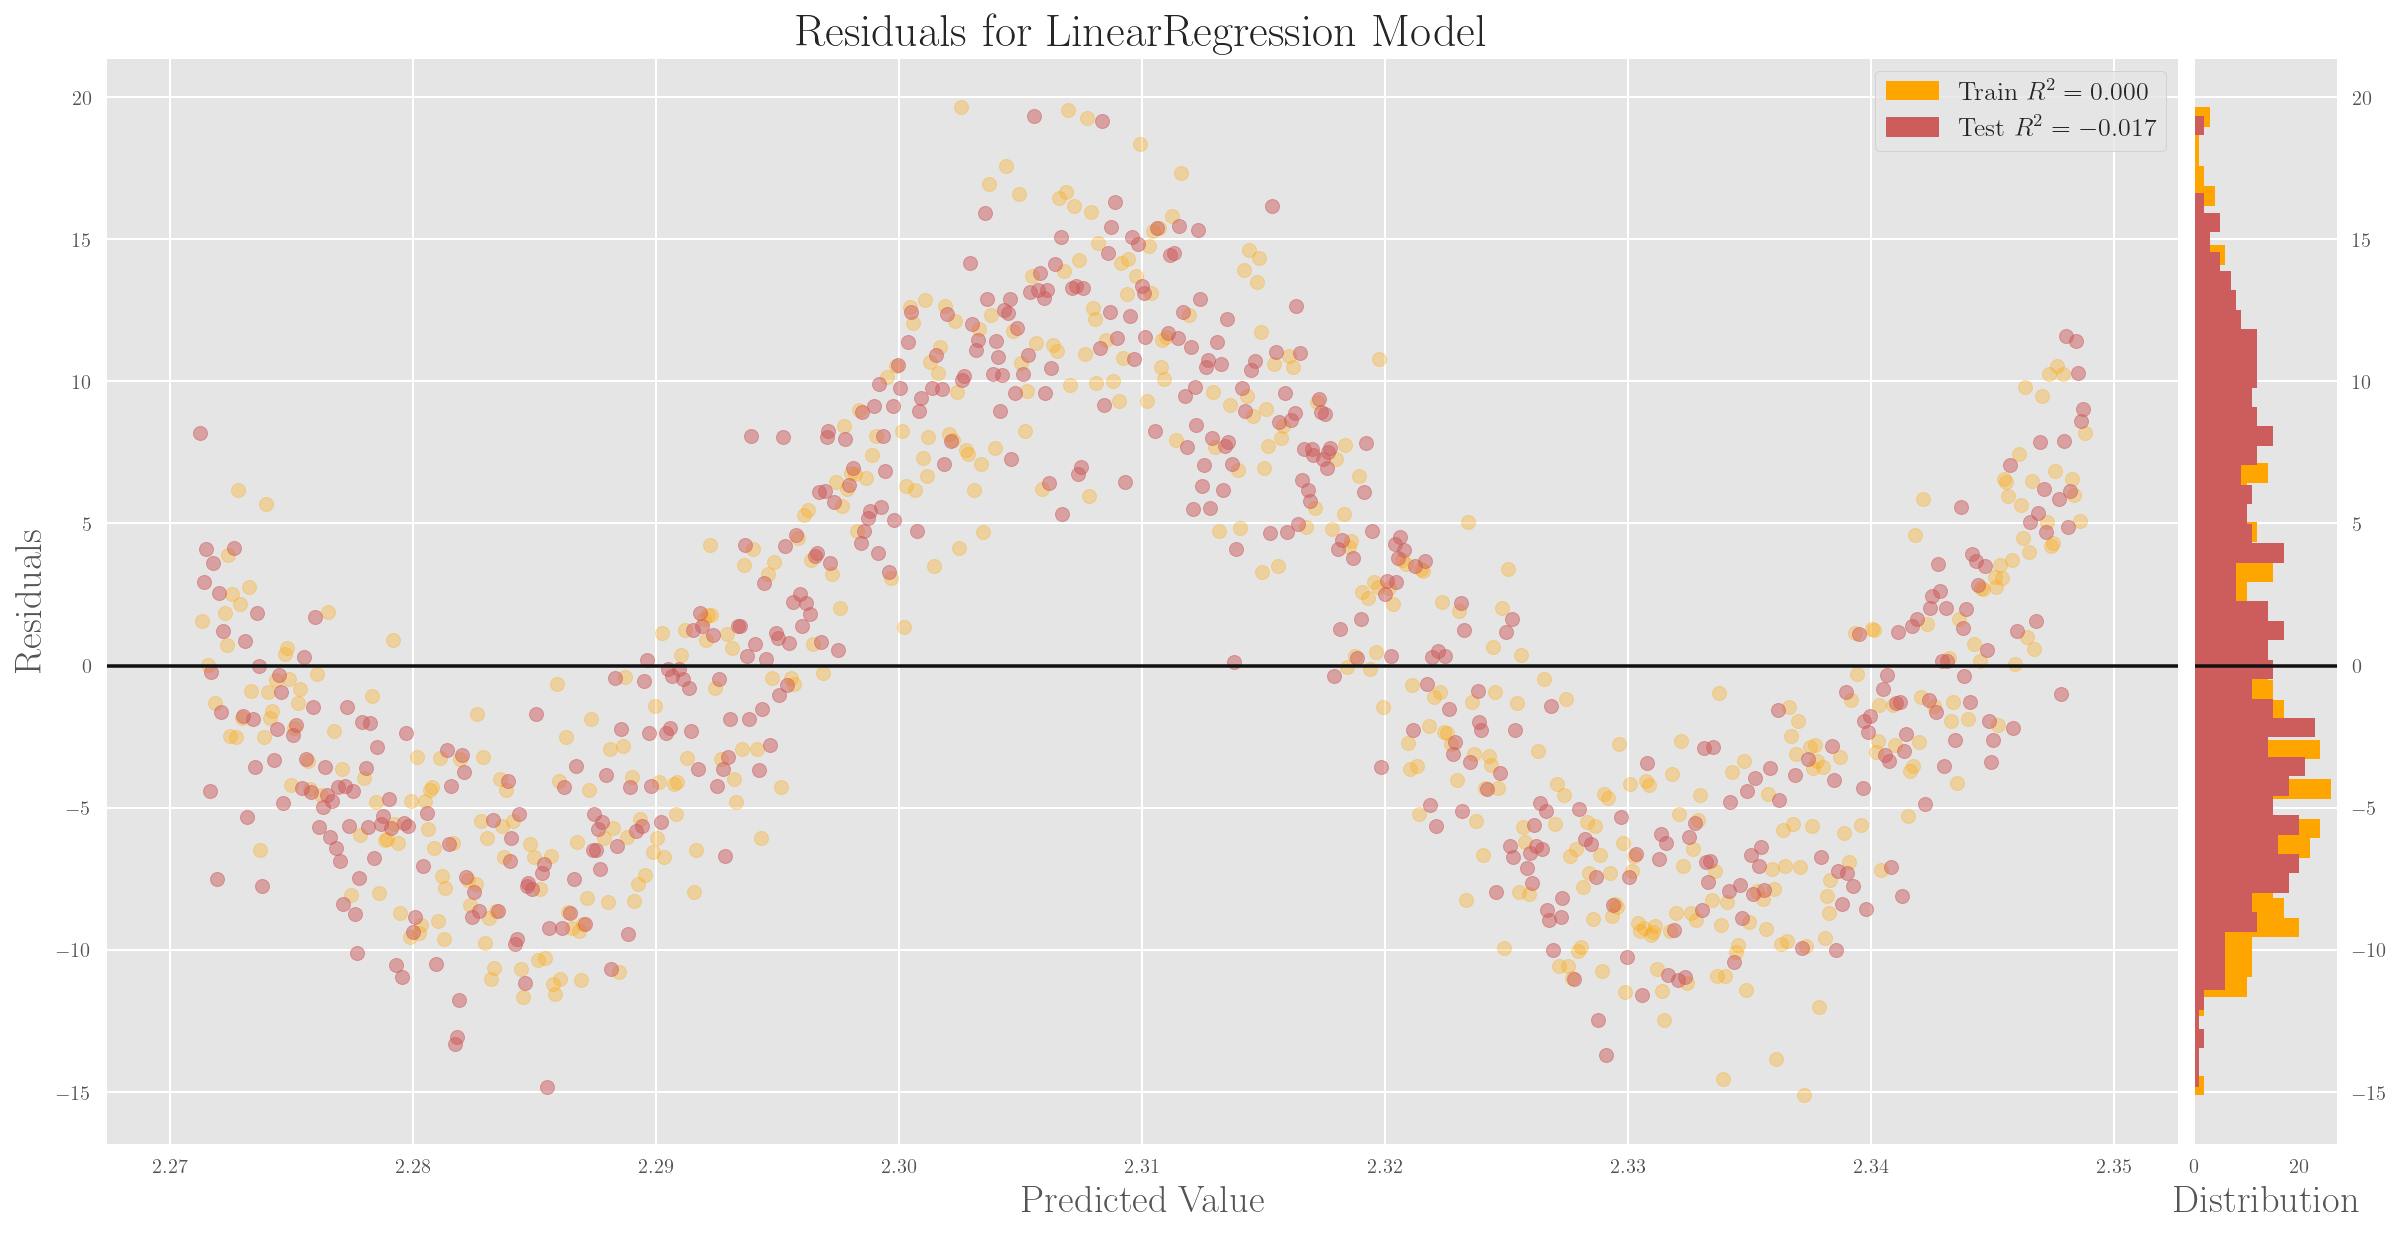

In [13]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [14]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

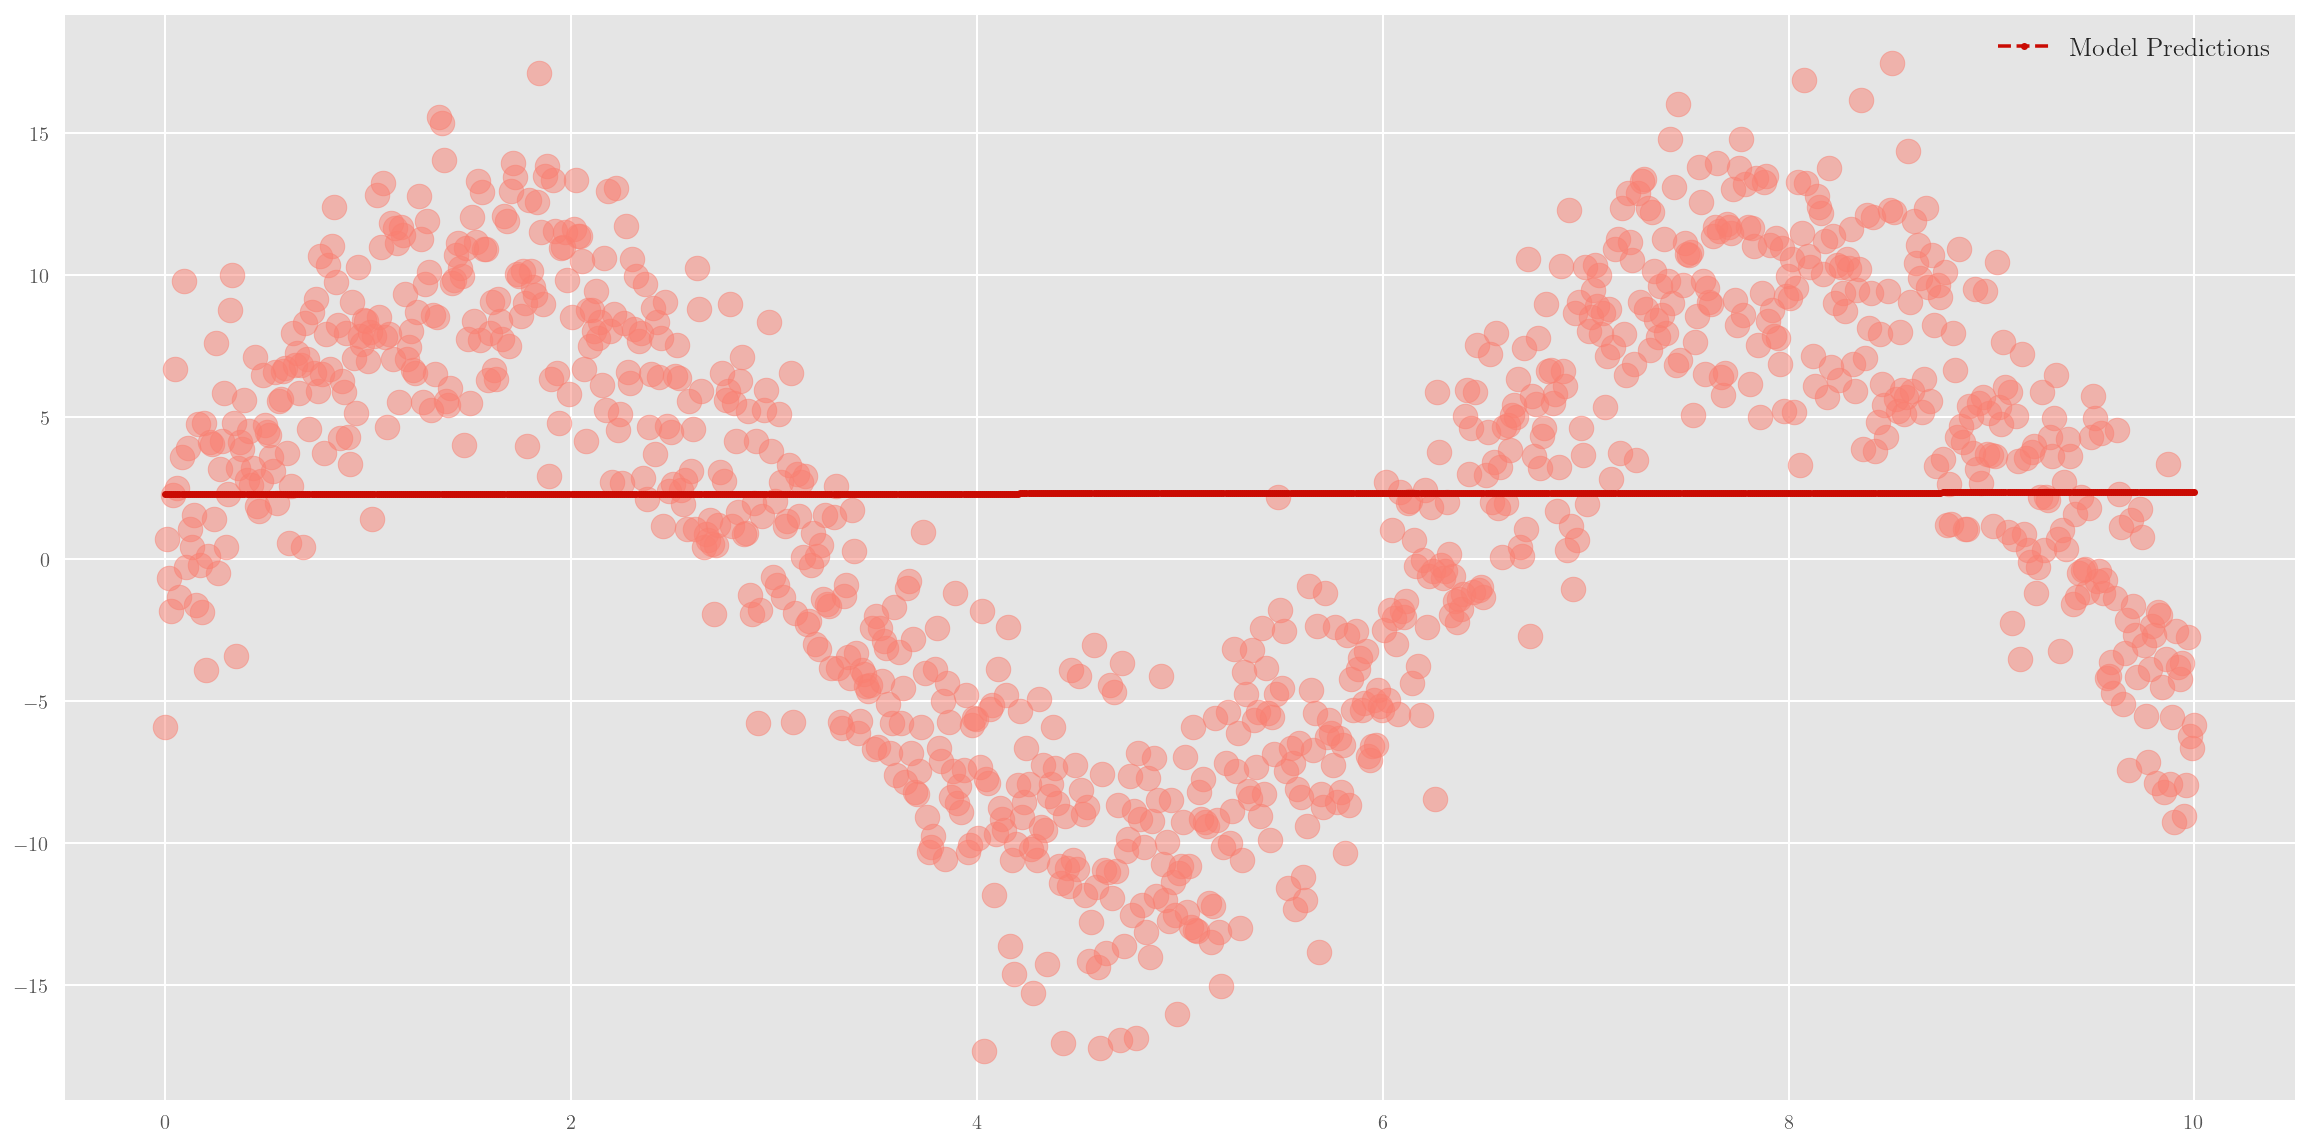

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This simple linear model has, as one would have expected by now, failed terribly!

# Polynomial Regression

from the prior notebooks is that adding polynomial features to the dataset, and then performing the regression can be an effective tool. 

**since we observe 3 distinct bends in the data, we should expect a polynomial of degree no less than 4 to fit the data.** With some experimentation, we find that a polynomial of degree 4 proves reasonably effective, and a polynomial of degree 9 is very good.

merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [16]:
degree     = 9
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.00000000e+00  2.57346139e+00  9.35951934e+00 -6.62576680e+00
  1.33370076e+00 -9.58262637e-02  8.55821064e-03 -2.23310728e-03
  2.37017960e-04 -8.02637022e-06]
Mean squared error: 8.47
Coefficient of Determination (R^2):0.8412193546836683


The coefficient of determination seems quite encouraging. Let us now proceed to the residual analysis.

## Residual Analysis

start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

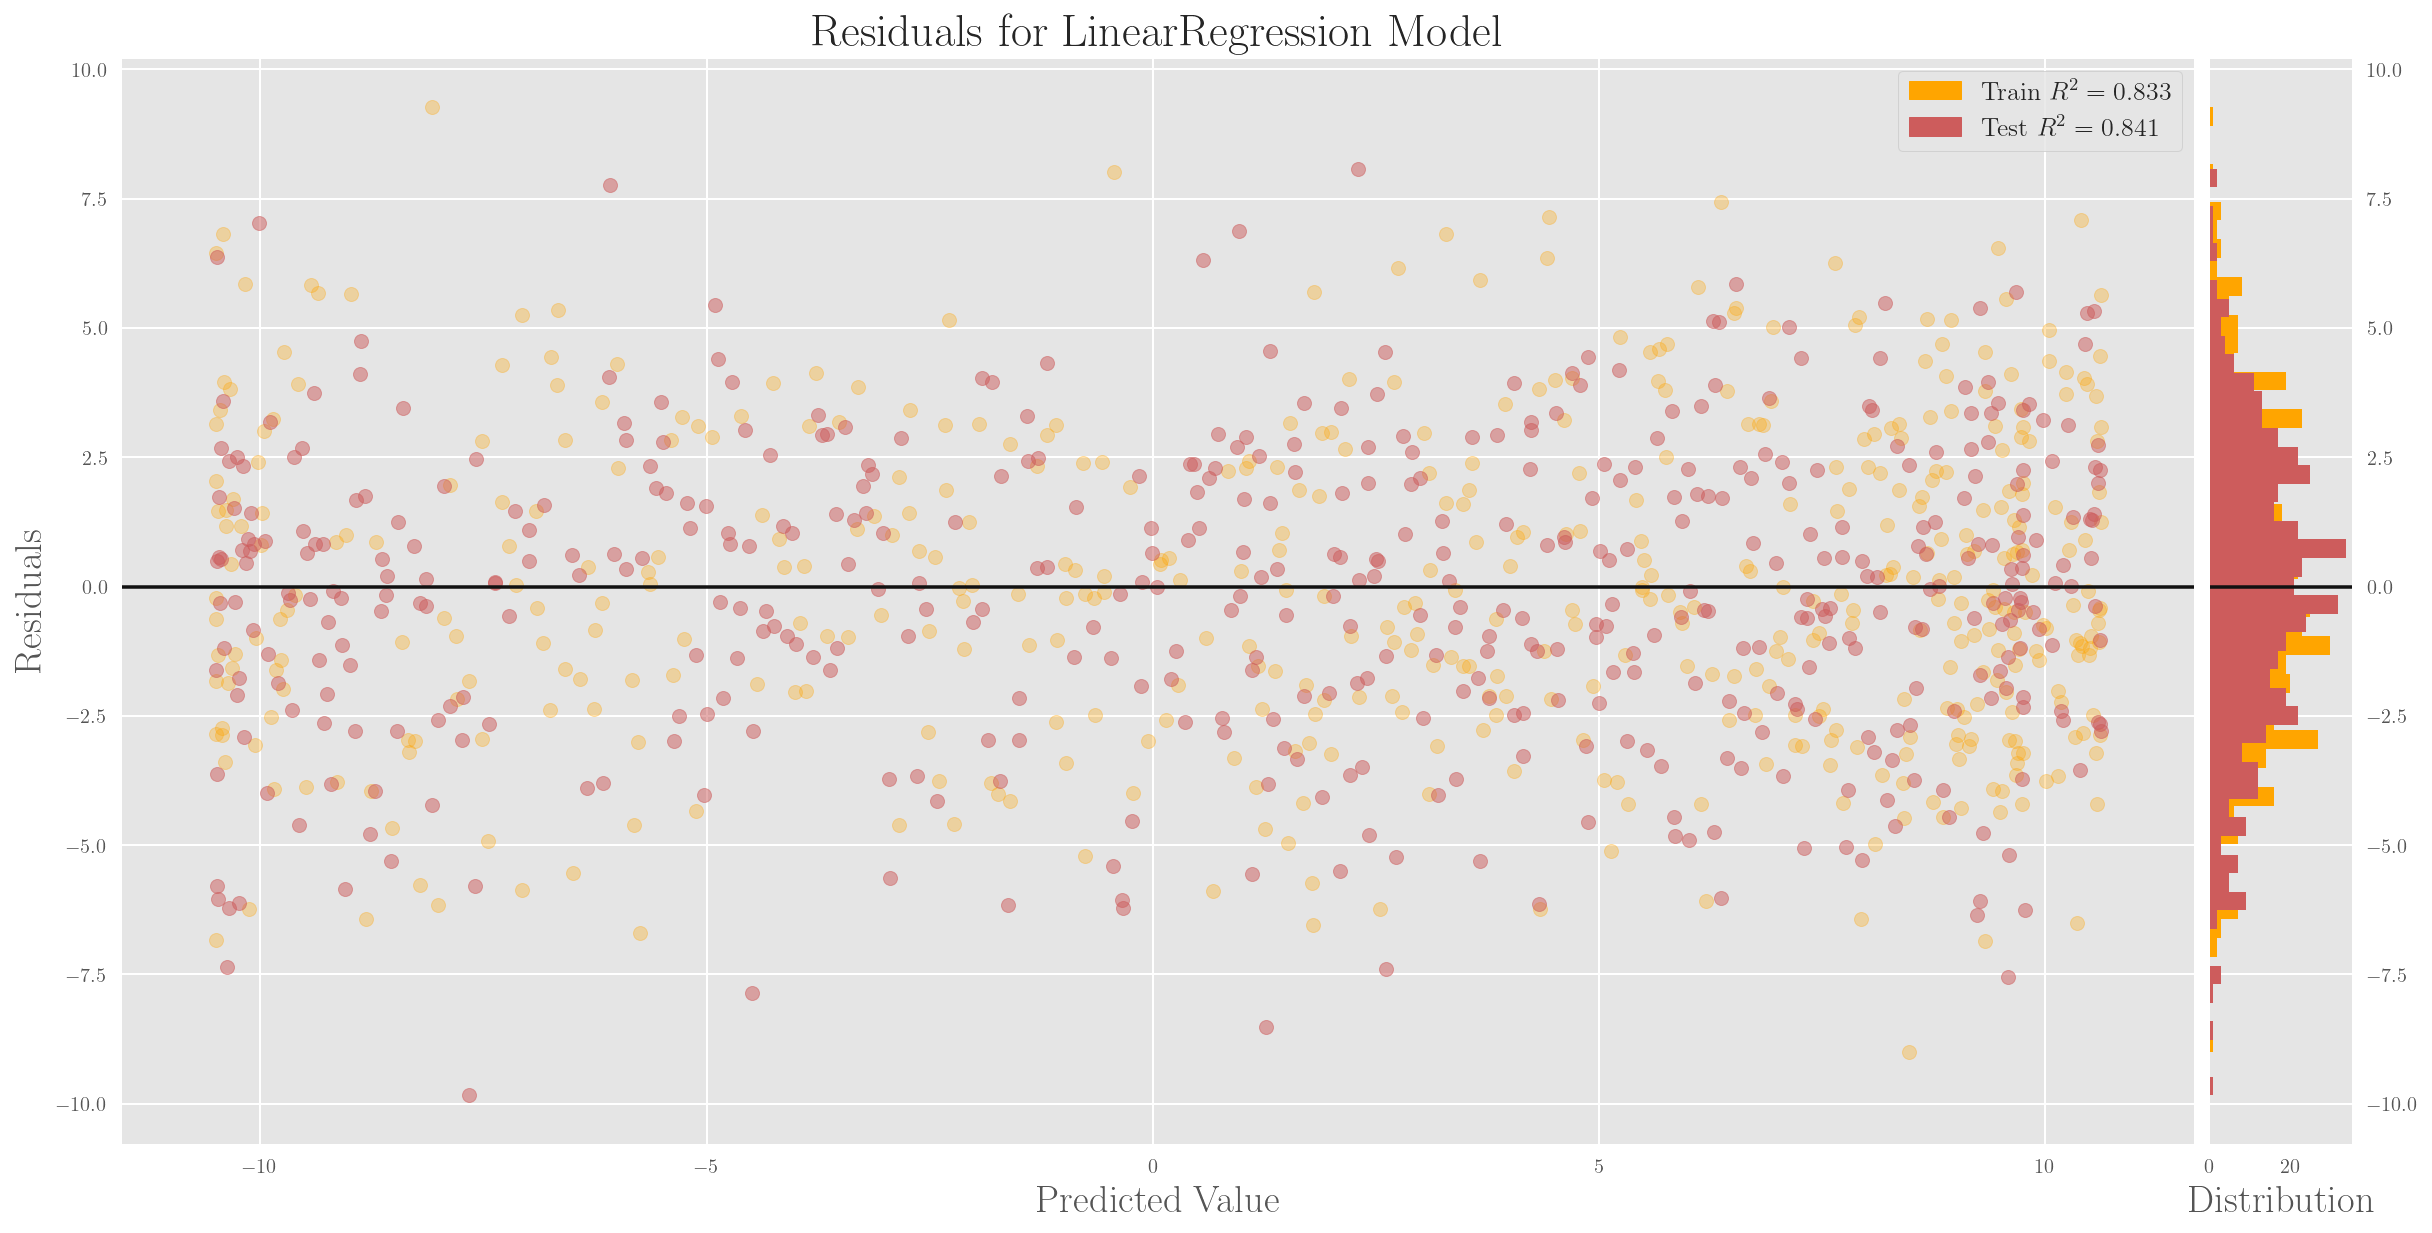

In [17]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

This is quite encouraging. We notice homoscedasticity of the residuals, and no discernible pattern. Altogether, along with the good coefficient of determination $R^2$, we may be inclined to believe we have a good model. However, it is worth confirming with a visualization of the model predictions.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [18]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

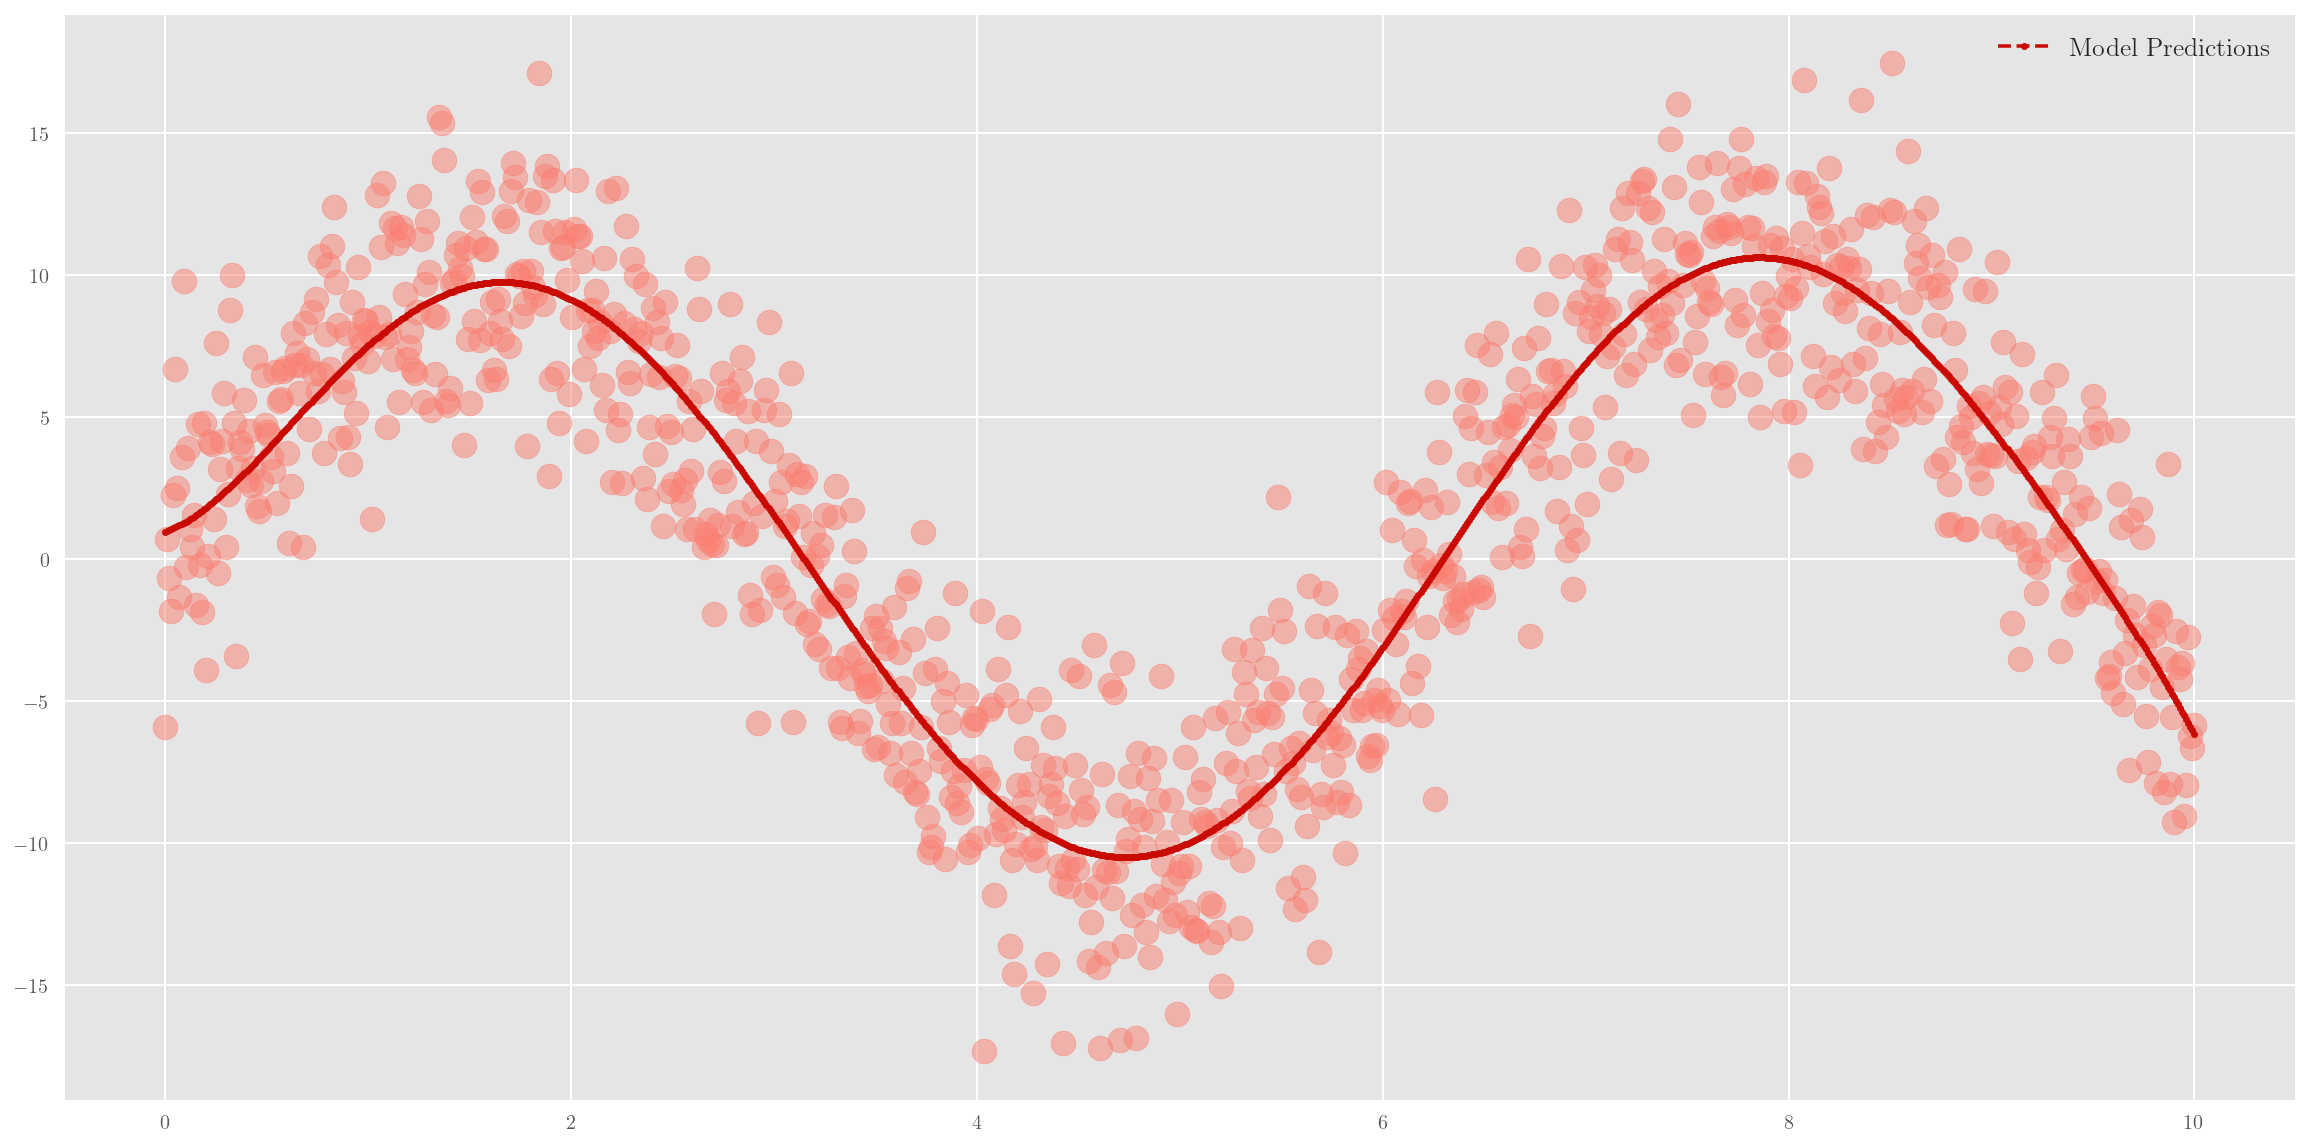

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

# Conclusion

While simple linear regression was not effective, the polynomial regression proved quite effective. In this case, a polynomial of the fourth degree was the minimum needed, since there are three bends in the data. However, some experimentation showed that it gets much better as we go to slightly higher degrees.
